# FIND THE BEST CATEGORIZATION METHOD FOR NUMERIC FEATURES

### Caution: Before section
#### If you don't understand CART categorization please check up this link:
[CART analysis for stroke prediction](https://www.kaggle.com/code/zzettrkalpakbal/cart-analysis-for-stroke-prediction-acc-94-9)

![](https://images.ctfassets.net/3viuren4us1n/4jw95A7JsM8bx6jPGCBSka/9c16251949c69108d0702d7fc0ce8042/product_categorization.jpg)

#### Actually, I could have done all my work on this subject (stroke prediction) with a single notebook, but this would be very complex for review, and unfortunately, would cause a loss of information. I really work hard to create something different. I also have a hard time reading long notebooks and I think it would be more beneficial if they were in separated by goal sections.

In [1]:
# Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#!pip uninstall scipy -y
#!pip uninstall pingouin -y
!pip install pingouin
import pingouin as pg
import warnings

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 185.4/185.4 kB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
  Preparing metadata (setup.py) ... - done
  Created wheel for pingouin: filename=pingouin-0.5.2-py3-none-any.whl size=196206 sha256=aeb8c11a735395910e53b9ea164df56b0d38f7bec097261c4f106a0b41b905a6
  Stored in directory: /root/.cache/pip/wheels/11/5a/63/a6d32fc26fa462c731f65480bfb98ff7bd39b8ebcb4bc6c2fe
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=36377f142fb8a45d67906768ccee6d9386c092a19a7dd64905e7969dcb1675c8
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils


#### I have used handled bmi features.
#### You can check-up that how handling of missing values with this [link.](https://www.kaggle.com/code/zzettrkalpakbal/pycaret-regressor-for-integrating-missing-values)


In [2]:
df = pd.read_csv("../input/full-filled-brain-stroke-dataset/full_data.csv")

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTS2WQYfu3aLkmpLTyc3so7aktnshobxZ30qQ&usqp=CAU)

* A stroke is a medical condition in which poor blood flow to the brain causes cell death. There are two main types of stroke: ischemic, due to lack of blood flow, and hemorrhagic, due to bleeding. Both cause parts of the brain to stop functioning properly. Signs and symptoms of a stroke may include an inability to move or feel on one side of the body, problems understanding or speaking, dizziness, or loss of vision to one side. Signs and symptoms often appear soon after the stroke has occurred. If symptoms last less than one or two hours, the stroke is a transient ischemic attack (TIA), also called a mini-stroke. A hemorrhagic stroke may also be associated with a severe headache. The symptoms of a stroke can be permanent. Long-term complications may include pneumonia and loss of bladder control.

* The main risk factor for stroke is high blood pressure. Other risk factors include high blood cholesterol, tobacco smoking, obesity, diabetes mellitus, a previous TIA, end-stage kidney disease, and atrial fibrillation. An ischemic stroke is typically caused by blockage of a blood vessel, though there are also less common causes. A hemorrhagic stroke is caused by either bleeding directly into the brain or into the space between the brain's membranes. Bleeding may occur due to a ruptured brain aneurysm. Diagnosis is typically based on a physical exam and supported by medical imaging such as a CT scan or MRI scan. A CT scan can rule out bleeding, but may not necessarily rule out ischemia, which early on typically does not show up on a CT scan. Other tests such as an electrocardiogram (ECG) and blood tests are done to determine risk factors and rule out other possible causes. Low blood sugar may cause similar symptoms.

* Prevention includes decreasing risk factors, surgery to open up the arteries to the brain in those with problematic carotid narrowing, and warfarin in people with atrial fibrillation. Aspirin or statins may be recommended by physicians for prevention. A stroke or TIA often requires emergency care. An ischemic stroke, if detected within three to four and half hours, may be treatable with a medication that can break down the clot. Some hemorrhagic strokes benefit from surgery. Treatment to attempt recovery of lost function is called stroke rehabilitation, and ideally takes place in a stroke unit; however, these are not available in much of the world.

* Attribute Information
    * 1) gender: "Male", "Female" or "Other"
    * 2) age: age of the patient
    * 3) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
    * 4) heartdisease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
    * 5) evermarried: "No" or "Yes"
    * 6) worktype: "children", "Govtjov", "Neverworked", "Private" or "Self-employed" 7) Residencetype: "Rural" or "Urban"
    * 8) avgglucoselevel: average glucose level in blood
    * 9) bmi: body mass index
    * 10) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"
        * Note: "Unknown" in smoking_status means that the information is unavailable for this patient
    * 11) stroke: 1 if the patient had a stroke or 0 if not


Real data sources:

In [3]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [4]:
# Selecting columns type

def grab_col_names(dataframe, cat_th=10, car_th=20):

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
  
    return cat_cols, num_cols, cat_but_car
###
cat_cols, num_cols, cat_but_car = grab_col_names(df)
target = "stroke"

# Inferential statistic methods should never be underestimated.
### We can more understand data with inferential statistic.
#### Bu today our goal is different, find to best categorical method!
![](https://cdn-images-1.medium.com/max/616/1*ZJ-se-X3nYulpTmEo2T9HA.png)

Skewness of age feature:  -0.14
**********
Kurtosis of age feature:  -0.99
**********
Shapiro-Wilk Normality test of age feature: 
             W          pval  normal
age  0.966632  1.761990e-32   False
**********


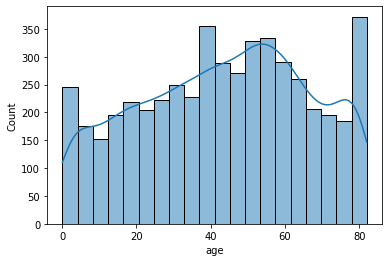

In [5]:
print("Skewness of age feature: ",df.age.skew().round(2))
print("*"*10)
print("Kurtosis of age feature: ",df.age.kurt().round(2))
print("*"*10)
print("Shapiro-Wilk Normality test of age feature: \n",pg.normality(df.age))
print("*"*10)
sns.histplot(df.age,kde=True)
plt.show()

Skewness of avg_glucose_level feature:  1.59
**********
Kurtosis of avg_glucose_level feature:  1.75
**********
Shapiro-Wilk Normality test of avg_glucose_level feature: 
                           W  pval  normal
avg_glucose_level  0.805101   0.0   False
**********


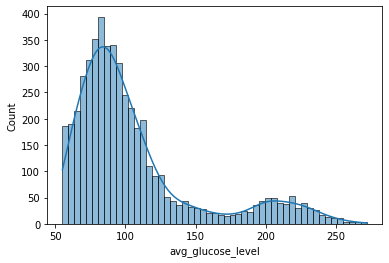

In [6]:
print("Skewness of avg_glucose_level feature: ",df.avg_glucose_level.skew().round(2))
print("*"*10)
print("Kurtosis of avg_glucose_level feature: ",df.avg_glucose_level.kurt().round(2))
print("*"*10)
print("Shapiro-Wilk Normality test of avg_glucose_level feature: \n",pg.normality(df.avg_glucose_level))
print("*"*10)

sns.histplot(df.avg_glucose_level,kde=True)
plt.show()

Skewness of bmi feature:  0.37
**********
Kurtosis of bmi feature:  -0.14
**********
Shapiro-Wilk Normality test of bmi feature: 
             W          pval  normal
bmi  0.987395  1.075952e-20   False
**********


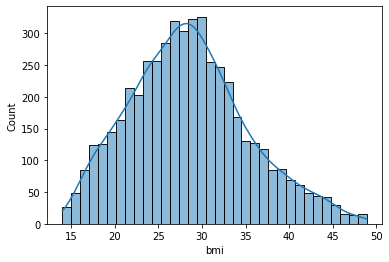

In [7]:
print("Skewness of bmi feature: ",df.bmi.skew().round(2))
print("*"*10)
print("Kurtosis of bmi feature: ",df.bmi.kurt().round(2))
print("*"*10)
print("Shapiro-Wilk Normality test of bmi feature: \n",pg.normality(df.bmi))
print("*"*10)
sns.histplot(df.bmi,kde=True)
plt.show()

### * All calculations are carried out for samples larger than 5000. Although 𝑊 will be calculated correctly, the accuracy of its 𝑃-value cannot be guaranteed. Our samples are near the 5000

##### Nearest sample for normal distribution. But it is not.
##### Skewness and Kurtosis value are showing normally distribution.

## On the other hand, we should also look at the outlier values.

In [8]:
def outliers (df_out,drop=False):
    for each_feature in df_out.columns:
        feature_data = df_out[each_feature]
        Q1 = np.round(np.percentile(feature_data,25),2)
        Q3 = np.round(np.percentile(feature_data,75),2)
        IQR = np.round(Q3-Q1,2)
        outlier_step = np.round(IQR * 1.5,2)
        print("Max",np.max(feature_data),"Min",np.min(feature_data),"Mean",np.round(np.mean(feature_data),2))
        print("IQR: ",IQR,"Q1: ",Q1,"down board: ",Q1-outlier_step," Q3: ",Q3,"upper board: ",Q3+outlier_step)
        outliers = feature_data[~((feature_data >= Q1 - outlier_step)&(feature_data <= Q3 + outlier_step))].index.tolist()
        print('For the feature {}, No of Outliers is {}'.format(each_feature,len(outliers)))

for i in num_cols:
    print(i)
    outliers(df[[i]])
    print(80*"_")

age
Max 82.0 Min 0.08 Mean 43.42
IQR:  36.0 Q1:  25.0 down board:  -29.0  Q3:  61.0 upper board:  115.0
For the feature age, No of Outliers is 0
________________________________________________________________________________
avg_glucose_level
Max 271.74 Min 55.12 Mean 105.94
IQR:  36.63 Q1:  77.23 down board:  22.28  Q3:  113.86 upper board:  168.81
For the feature avg_glucose_level, No of Outliers is 602
________________________________________________________________________________
bmi
Max 48.9 Min 14.0 Mean 28.5
IQR:  8.9 Q1:  23.7 down board:  10.35  Q3:  32.6 upper board:  45.95
For the feature bmi, No of Outliers is 43
________________________________________________________________________________


In [9]:
print("Avg glucose level have: {} number of outlier values".format(df[df.avg_glucose_level>168.81].shape[0]))
print("Also if we are dropping outliers, we will lost {} number of target values. ".format(df[df.avg_glucose_level>168.81].stroke.value_counts().values[1]))

Avg glucose level have: 602 number of outlier values
Also if we are dropping outliers, we will lost 83 number of target values. 


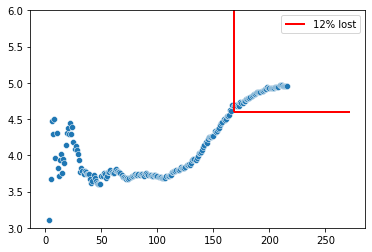

In [10]:
liste = []

for i in np.arange(df.avg_glucose_level.min(),df.avg_glucose_level.max()):
    a = df[df.avg_glucose_level<i].stroke.value_counts().values
    if len(a)>1:
        liste.append(100*(a[1]/np.sum(a)))
    else:
        liste.append(0)

    
sns.scatterplot(x=range(len(liste)),y=liste)
plt.hlines(y=4.6, xmin=168.81, xmax=df.avg_glucose_level.max(), colors='red', linestyles='-', lw=2,label="12% lost")
plt.vlines(x=168.81, ymin=4.6, ymax=6, colors='red', linestyles='-', lw=2,)
plt.legend()
plt.ylim(3,6)
plt.show()

# I think is we must dooesn't drop outliers. 

# STRATIFICATION
### I was firstly stratification via medical guidelines.
#### In the medicine field inferential methods used commonlyr for understanding to data.
* The t-test is any statistical hypothesis test in which the test statistic follows a Student's t-distribution under the null hypothesis.

* A t-test is the most commonly applied when the test statistic would follow a normal distribution if the value of a scaling term in the test statistic were known. When the scaling term is unknown and is replaced by an estimate based on the data, the test statistics (under certain conditions) follow a Student's t distribution. The t-test can be used, for example, to determine if the means of two sets of data are significantly different from each other.

* I also used it to compare the values of patients who already had stroke with those who did not have stroke to see how much these two groups differ from each other.

![](https://cdn.analyticsvidhya.com/wp-content/uploads/2019/05/t-test.jpg)

In [11]:
# Let's investigating to t-test of numeric values:
def ttest(all_data,num_cols,target_column,paired_=False):
  # alternative = "two-sided","less","greater"
    tt = pd.DataFrame()
    values = ['T', 'dof', 'alternative', 'p-val', 'CI95%', 'cohen-d', 'BF10','power']
    tt["values"] = values
    tt.set_index("values")
    for i in num_cols:
        q = pg.ttest(all_data[all_data[target_column]==1][i],
                   all_data[all_data[target_column]==0][i],
                   paired=paired_, # If you have same lenght array change to True
                   alternative='two-sided',
                   correction='auto',
                   r=0.707,
                   confidence=0.95).round(3).values

        tt["ttest_with_"+str(i)] = q.T
    tt = tt.T
    tt.rename(columns=tt.iloc[0],inplace=True)
    tt.drop(tt.index[0],inplace=True)
    hypothesis = []
    for i in range(len(tt)):    
        if tt["p-val"][i]<0.05:
            hypothesis.append("Different_population")
        else:
            hypothesis.append("Same_population")
    tt["hypothesis"] = hypothesis
    return tt   
ttest(df,num_cols,target)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power,hypothesis
ttest_with_age,29.595,333.6,two-sided,0.0,"[23.97, 27.39]",1.169,1.49e+173,1.0,Different_population
ttest_with_avg_glucose_level,6.948,260.056,two-sided,0.0,"[19.78, 35.43]",0.618,1.418e+09,1.0,Different_population
ttest_with_bmi,4.767,286.111,two-sided,0.0,"[1.04, 2.51]",0.262,5161.258,0.98,Different_population


### I have understood with t-test that, All the numeric features are important for discriminating to target population. 

# Glucose levels
![](https://ncmkak2op1ygpx62dn79ct7z-wpengine.netdna-ssl.com/wp-content/uploads/2021/08/BloodGlucoseChart.jpg)

### We have just average values, I want to use fasting values. Because, average blood glucose near to fasting values rather than eating intervals (domain info).

In [12]:
# Finding the categorical years

df.loc[(df.avg_glucose_level < 80), 'glucat'] = 1
df.loc[(df.avg_glucose_level >= 80)&(df.avg_glucose_level<100), 'glucat'] = 2
df.loc[(df.avg_glucose_level >= 100)&(df.avg_glucose_level<126), 'glucat'] = 3
df.loc[(df.avg_glucose_level >= 126), 'glucat'] = 4

df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,glucat
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,4.0
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,3.0
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,4.0
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,4.0
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,4.0


# Body mass index (BMI)
* Body mass index (BMI) is a person’s weight in kilograms divided by the square of height in meters. BMI is an inexpensive and easy screening method for weight category—underweight, healthy weight, overweight, and obesity.

* BMI does not measure body fat directly, but BMI is moderately correlated with more direct measures of body fat. Furthermore, BMI appears to be as strongly correlated with various metabolic and disease outcome as are these more direct measures of body fatness.

* Formula: weight (kg) / [height (m)]^2
    * With the metric system, the formula for BMI is weight in kilograms divided by height in meters squared. Because height is commonly measured in centimeters, divide height in centimeters by 100 to obtain height in meters.

    * Example: Weight = 68 kg, Height = 165 cm (1.65 m)
    * Calculation: 68 ÷ (1.65)^2 = 24.98

![](https://journey-fit.com/wp2021/wp-content/uploads/2021/07/bmi-categories_med.jpg)

In [13]:
df.loc[(df.bmi <= 18.5), 'bmicat'] = 1
df.loc[(df.bmi > 18.4) & (df.bmi < 25), 'bmicat'] = 2
df.loc[(df.bmi >= 25) & (df.bmi < 30), 'bmicat'] = 3
df.loc[(df.bmi >= 30) & (df.bmi < 35), 'bmicat'] = 4
df.loc[(df.bmi >= 35) & (df.bmi < 40), 'bmicat'] = 5
df.loc[(df.bmi >= 40), 'bmicat'] = 6
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,glucat,bmicat
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,4.0,5.0
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,3.0,4.0
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,4.0,4.0
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,4.0,2.0
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,4.0,3.0


In [14]:
df.loc[(df.age<=40), 'agecat'] = 1 # Because of it is adult disease.
df.loc[(df.age > 40)&(df.age<=50), 'agecat'] = 2
df.loc[(df.age > 50)&(df.age<=60), 'agecat'] = 3
df.loc[(df.age > 60)&(df.age<=70), 'agecat'] = 4
df.loc[(df.age > 70), 'agecat'] = 5
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,glucat,bmicat,agecat
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,4.0,5.0,4.0
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,3.0,4.0,5.0
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,4.0,4.0,2.0
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,4.0,2.0,5.0
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,4.0,3.0,5.0


In [15]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print("\t\t\t"+" Statistical summary of "f"{numerical_col}")
    print("\t\t\t---------------------------------------------")
    print(pd.DataFrame(dataframe[numerical_col].describe(quantiles)).T, "\n")

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show()
def num_analyser_plot(df, num_col, target_col):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    
    sns.histplot(df[num_col], kde=True, bins=30, ax=axes[0]);
    axes[0].lines[0].set_color('green')
    axes[0].set_title(f"{num_col}"+" "+"Distrubition")
    axes[0].set_ylabel("Observation")
    
    quantiles = [0, 0.25, 0.50, 0.75, 1]
    num_df = df.copy()
    num_df[f"{num_col}"+"_CAT"] = pd.qcut(df[num_col], q=quantiles) 
    df_2 = num_df.groupby(f"{num_col}"+"_CAT")[target_col].mean()
    
    sns.barplot(x=df_2.index, y=df_2.values);
    axes[1].set_title(f"The mean of the {target_col} feature in the stratification of {num_col} feature")
    axes[1].set_ylabel(f"{target_col}")

    plt.show()

**********
age
			 Statistical summary of age
			---------------------------------------------
      count       mean        std   min   5%   10%   20%   30%   40%   50%  \
age  4981.0  43.419859  22.662755  0.08  5.0  11.0  21.0  30.0  38.0  45.0   

      60%   70%   80%   90%   95%   99%   max  
age  52.0  58.0  65.0  75.0  79.0  82.0  82.0   



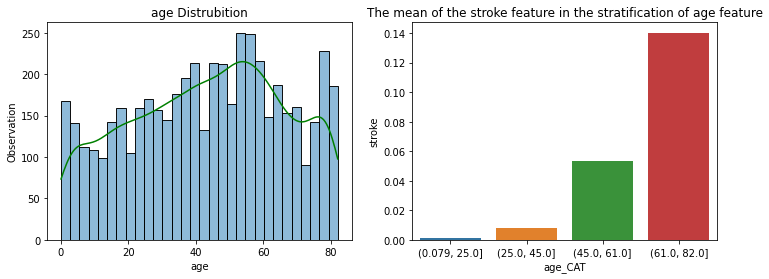

**********
**********
avg_glucose_level
			 Statistical summary of avg_glucose_level
			---------------------------------------------
                    count        mean        std    min     5%    10%    20%  \
avg_glucose_level  4981.0  105.943562  45.075373  55.12  60.73  65.79  73.81   

                     30%   40%    50%    60%     70%     80%     90%    95%  \
avg_glucose_level  80.05  85.6  91.85  98.73  108.32  123.83  191.47  216.0   

                      99%     max  
avg_glucose_level  240.82  271.74   



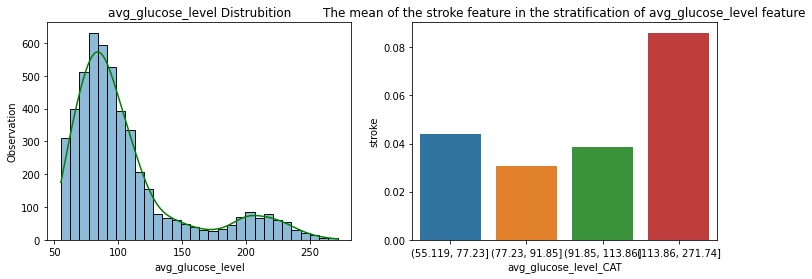

**********
**********
bmi
			 Statistical summary of bmi
			---------------------------------------------
      count       mean       std   min    5%   10%   20%   30%   40%   50%  \
bmi  4981.0  28.498173  6.790464  14.0  17.9  19.8  22.6  24.7  26.5  28.1   

      60%   70%   80%   90%   95%   99%   max  
bmi  29.7  31.6  33.9  37.8  41.1  45.5  48.9   



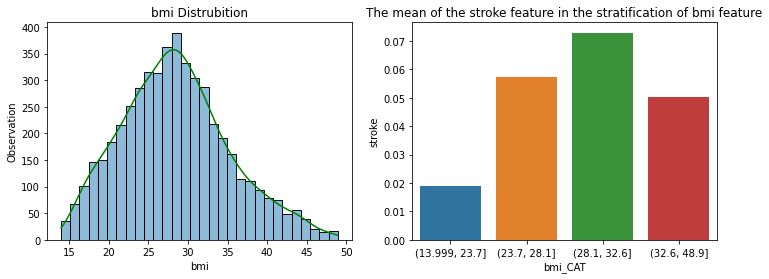

**********


In [16]:
# Findind and visaualization to quantiles
for i in num_cols:
    print(10*"*")
    print(i)
    num_summary(df, i)
    num_analyser_plot(df, i, target)
    print(10*"*")  

In [17]:
# Quantile Stratification
_names = ["q1","q2","q3","q4"]
bin_of_bmi = [13.99,23.7,28.1,32.6,48.9]
df["bmi"+str("_qb")] = pd.cut(df["bmi"],bin_of_bmi,labels=_names,include_lowest=True)
bin_of_glucose = [55.11,77.23,91.85,113.86,271.74]
df["avg_glucose_level"+str("_qb")] = pd.cut(df["avg_glucose_level"],bin_of_glucose,labels=_names,include_lowest=True)
bin_of_age = [0,25,45,61,82]
df["age"+str("_qb")] = pd.cut(df["age"],bin_of_age,labels=_names,include_lowest=True)
df.head()


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,glucat,bmicat,agecat,bmi_qb,avg_glucose_level_qb,age_qb
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,4.0,5.0,4.0,q4,q4,q4
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,3.0,4.0,5.0,q3,q3,q4
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,4.0,4.0,2.0,q4,q4,q3
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,4.0,2.0,5.0,q2,q4,q4
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,4.0,3.0,5.0,q3,q4,q4


In [18]:
# uniform splittingdef binning_df(num_cols):

def binning_df(num_cols):
    for i in num_cols:
        bins = np.linspace(min(df[i]),max(df[i]),5)
        _names = ["low","low_normal","high_normal","high"]
        df[i+str("_binned")] = pd.cut(df[i],bins,labels=_names,include_lowest=True)
    return df
binning_df(num_cols)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,glucat,bmicat,agecat,bmi_qb,avg_glucose_level_qb,age_qb,age_binned,avg_glucose_level_binned,bmi_binned
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,4.0,5.0,4.0,q4,q4,q4,high,high,high_normal
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,3.0,4.0,5.0,q3,q3,q4,high,low,high_normal
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,4.0,4.0,2.0,q4,q4,q3,high_normal,high_normal,high_normal
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,4.0,2.0,5.0,q2,q4,q4,high,high_normal,low_normal
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,4.0,3.0,5.0,q3,q4,q4,high,high_normal,low_normal


In [19]:
# CART Stratification
# I finded threshold by CART algo.
# https://www.kaggle.com/code/zzettrkalpakbal/cart-analysis-for-stroke-prediction-acc-94-9

df.loc[(df.age>73.5),"age_cart"] = 5
df.loc[(df.age<=73.5)&(df.age>53.5),"age_cart"] = 4
df.loc[(df.age<=53.5)&(df.age>37.5),"age_cart"] = 3
df.loc[(df.age<=37.5)&(df.age>2),"age_cart"] = 2
df.loc[(df.age<=2),"age_cart"] = 1
df.loc[(df.avg_glucose_level>=213.47),"glu_cart"] = 4
df.loc[(df.avg_glucose_level<213.47)&(df.avg_glucose_level>=180.86),"glu_cart"] = 3
df.loc[(df.avg_glucose_level<180.86)&(df.avg_glucose_level>=70.44),"glu_cart"] = 2
df.loc[(df.avg_glucose_level<70.44),"glu_cart"] = 1
df.loc[(df.bmi>=39.15),"bmi_cart"] = 4
df.loc[(df.bmi<39.15)&(df.bmi>=31.95),"bmi_cart"] = 3
df.loc[(df.bmi<31.95)&(df.bmi>=28.35),"bmi_cart"] = 2
df.loc[(df.bmi<28.35),"bmi_cart"] = 1
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,...,agecat,bmi_qb,avg_glucose_level_qb,age_qb,age_binned,avg_glucose_level_binned,bmi_binned,age_cart,glu_cart,bmi_cart
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,...,4.0,q4,q4,q4,high,high,high_normal,4.0,4.0,3.0
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,...,5.0,q3,q3,q4,high,low,high_normal,5.0,2.0,3.0
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,...,2.0,q4,q4,q3,high_normal,high_normal,high_normal,3.0,2.0,3.0
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,...,5.0,q2,q4,q4,high,high_normal,low_normal,5.0,2.0,1.0
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,...,5.0,q3,q4,q4,high,high_normal,low_normal,5.0,3.0,2.0


### Please suggest another methods of categorization, then I will updated notebook.

In [20]:
#Preparing for PyCaret

In [21]:
# pycaret libraries have some limitation in virtual operating system, 
# but it is in the your local already works properly  don't worry about that.
#!pip install --use-deprecated=legacy-resolver pycaret[full] --ignore-installed llvmlite
#!pip install markupsafe==2.0.1
#!pip install numba==0.53 --ignore-installed llvmlite
## RESTART NOTEBOOK from here and close above installation codes
#from pycaret.classification import *

In [22]:
df_raw = df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke']]

In [23]:
# If we doesnt take columns to Pycaret, pycaret definite the column type itself.
df_raw_cat = ['gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'smoking_status']
df_raw_num = ["age","avg_glucose_level","bmi"]
target = "stroke"

In [24]:
df_medical = df[['gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'smoking_status', 'stroke', 'glucat', 'bmicat', 'agecat']]

In [25]:
df_quantile = df[['gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'smoking_status', 'stroke', 'bmi_qb',
       'avg_glucose_level_qb', 'age_qb']]

In [26]:
df_bins = df[['gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'smoking_status', 'stroke', 'age_binned',
       'avg_glucose_level_binned', 'bmi_binned']]

In [27]:
df_cart = df[['gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'smoking_status', 'stroke', 'age_cart', 'glu_cart',
       'bmi_cart']]

In [28]:
df_medical_cat = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type', 'smoking_status', 'glucat', 'bmicat','agecat']
df_bins_cat = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type', 'smoking_status', 'age_binned','avg_glucose_level_binned', 'bmi_binned']
df_quantile_cat = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type',
       'Residence_type', 'smoking_status','bmi_qb', 'avg_glucose_level_qb', 'age_qb']
df_cart_cat = ['gender', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'smoking_status', 'age_cart', 'glu_cart',
       'bmi_cart']

In [29]:
#s = setup(data = df_cart,
#          categorical_features = df_cart_cat,
#          session_id=42,
#          target=target,
#          train_size=0.8,
#          fold_strategy='stratifiedkfold',
#          fold=10, 
#          fold_shuffle=True,
#          silent=True,
#          ignore_low_variance=True,
#          remove_multicollinearity = True,
#          normalize = True,
#          normalize_method = 'robust',
#          remove_outliers=True)
## For the best knowledge : https://pycaret.readthedocs.io/en/latest/api/classification.html
## API of pycaret really clear and understandable

In [30]:
## For comparing model
#top_models = compare_models(n_select=5,cross_validation=True,fold=10)

In [31]:
## For optimization
#catboost = tune_model(create_model('catboost'), optimize='Accuracy',
#                        search_library='optuna', search_algorithm='tpe',
#                        choose_better = False, n_iter = 20)

In [32]:
## For model evaluating
#evaluate_model(catboost)

# Raw data performance
<a href="https://ibb.co/k1dChyz"><img src="https://i.ibb.co/749mGzB/Ekran-Resmi-2022-07-17-13-26-41.png" alt="Ekran-Resmi-2022-07-17-13-26-41" border="0"></a>

#### Optimized CatBoost (Acc: 95.72, AUC: 82 from Acc: 95.43 AUC: 79.76)

# Medical categorization

<a href="https://ibb.co/FHBZJVD"><img src="https://i.ibb.co/0sf4ZtG/Ekran-Resmi-2022-07-17-13-40-57.png" alt="Ekran-Resmi-2022-07-17-13-40-57" border="0"></a>

#### Optimized CatBoost (Acc: 95.59, AUC: 83.50 from Acc: 94.9 AUC: 77.16)

# Binned categorization

<a href="https://ibb.co/q91BF6n"><img src="https://i.ibb.co/y5s0B2R/Ekran-Resmi-2022-07-17-13-55-00.png" alt="Ekran-Resmi-2022-07-17-13-55-00" border="0"></a><br /><a target='_blank' href='https://tr.imgbb.com/'></a><br />

#### Optimized CatBoost (Acc: 95.77, AUC: 81.96 from Acc: 95.01 AUC: 74.53)

# Quantile categorization
<a href="https://ibb.co/NtXzy6W"><img src="https://i.ibb.co/Fm9tDb8/Ekran-Resmi-2022-07-17-14-00-42.png" alt="Ekran-Resmi-2022-07-17-14-00-42" border="0"></a>

#### Optimized CatBoost (Acc: 95.59, AUC: 82.34 from Acc: 95.24 AUC: 75.53)

# CART categorization
<a href="https://ibb.co/mRg2CgS"><img src="https://i.ibb.co/S6GMXGJ/Ekran-Resmi-2022-07-17-14-07-23.png" alt="Ekran-Resmi-2022-07-17-14-07-23" border="0"></a>

#### Optimized CatBoost (Acc: 95.75, AUC: 82.83 from Acc: 95.19 AUC: 77.23)

(60.0, 100.0)

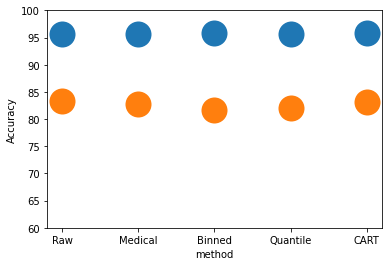

In [33]:
methods = ["Raw","Medical","Binned","Quantile","CART"]
acc = [95.72,95.59,95.77,95.59,95.75]
roc = [83.34,82.82,81.67,82.13,83.13]
performancedf = pd.DataFrame()
performancedf["method"] = methods
performancedf["Accuracy"] = acc
performancedf["ROC-AUC"] = roc
sns.scatterplot(x=performancedf.method,y=performancedf.Accuracy,s=800)
sns.scatterplot(x=performancedf.method,y=performancedf["ROC-AUC"],s=800)
plt.ylim(60,100)

In [34]:
performancedf

,method,Accuracy,ROC-AUC
0,Raw,95.72,83.34
1,Medical,95.59,82.82
2,Binned,95.77,81.67
3,Quantile,95.59,82.13
4,CART,95.75,83.13


### Best accuracy --> Binned for categorization
### Best ROC --> CART for categorization method. Actually Raw data have higher performance. I think pycaret dropped outliers automatically. 
#### The CART method simply categorizes numerical data and determines the boundaries to be separated. I think categorical data created with the CART method is nicely trained with catboost. In addition, the values I wrote are 10 times cross-validation results, of course there were 99% of them.
# But this highest results are too good, to be true.

In [35]:
#interpret_model(create_model("catboost"))

### When the evaluate the model by SHAP, it is really fitted for medicine
<a href="https://ibb.co/DkWPfM4"><img src="https://i.ibb.co/Cv8pK9B/Ekran-Resmi-2022-07-17-14-16-07.png" alt="Ekran-Resmi-2022-07-17-14-16-07" border="0"></a>

![](https://res.cloudinary.com/engineering-com/image/upload/w_640,h_640,c_limit/14362923312_79b705e965_b_g9qlm7.jpg)

### My experiment is over now. 
#### What I was learn, categorization of numeric features doesnt very important. Maybe it would be more accurate to say that it doesn't matter which method affects the result more.
#### There is an idiom in Turkish about unnecessary effort; "Removing the oil from a fly's wings". Yes we are removed the oil from a fly's wings but we are learned a lot of things about the categorization.  Thank you for reading this notebook. Keep contact.
![](https://sd.keepcalms.com/i-w600/please-follow-me-and-like-this.jpg)